In [ ]:
%pylab inline #no funciona correctamente con mi version de python

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from __future__ import division
from deltasigma import * 

#cambios necesarios para que funcione en python script
from matplotlib.pyplot import subplot, plot, xlabel, ylabel, title, semilogx, axis, grid, text, tight_layout
import numpy as np

NTF synthesis - demo #1
=======================

Demonstration of the **`synthesizeNTF`** function, as done in the **MATLAB Delta Sigma Toolbox**, employing its Python port **`deltasigma`**.



 * The **Noise Transfer Function** (NTF) is synthesized for a **5th-order**, **low-pass** modulator.

     * The first section deals with an **NTF without optimized zeros** (`opt=0`), 
     * while the second section with an **NTF *with optimized* zeros** (`opt=1`). 
     * Finally the two transfer functions are compared.

 * Then we move on to the synthesis of an **8th-order band-pass modulator** with optimized zeros.

5th-order modulator
-------------------

General parameters:

In [33]:
order = 5
OSR = 32

### 5th-order modulator: NTF without zeros optimization

The synthesis of an NTF can be performed with the `synthesizeNTF(order, OSR, opt)`.

We intentionally disable the zeros optimization, setting `opt=0`.

AttributeError: module 'pylab' has no attribute 'ishold'

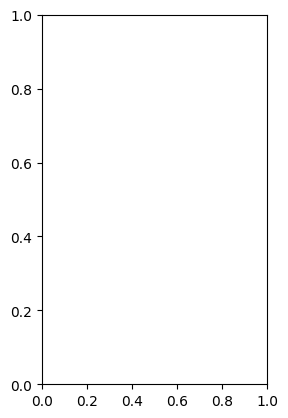

In [34]:
# Synthesize!
H0 = synthesizeNTF(order, OSR, opt=0)
# 1. Plot the singularities.
subplot(121)
plotPZ(H0, markersize=5)
title('NTF Poles and Zeros')
f = np.concatenate((np.linspace(0, 0.75/OSR, 100), np.linspace(0.75/OSR, 0.5, 100)))
z = np.exp(2j*np.pi*f)
magH0 = dbv(evalTF(H0, z))
# 2. Plot the magnitude responses.
subplot(222)
plot(f, magH0)
figureMagic([0, 0.5], 0.05, None, [-100, 10], 10, None, (16, 8))
xlabel('Normalized frequency ($1\\rightarrow f_s)$')
ylabel('dB')
title('NTF Magnitude Response')
# 3. Plot the magnitude responses in the signal band.
subplot(224)
fstart = 0.01
f = np.linspace(fstart, 1.2, 200)/(2*OSR)
z = np.exp(2j*np.pi*f)
magH0 = dbv(evalTF(H0, z))
semilogx(f*2*OSR, magH0)
axis([fstart, 1.2, -100,- 30])
grid(True)
sigma_H0 = dbv(rmsGain(H0, 0, 0.5/OSR))
#semilogx([fstart, 1], sigma_H0*np.array([1, 1]))
semilogx([fstart, 1], sigma_H0*np.array([1, 1]),'-o')
text(0.15, sigma_H0 + 5, 'rms gain = %5.0fdB' % sigma_H0)
xlabel('Normalized frequency ($1\\rightarrow f_B$)')
ylabel('dB')
tight_layout()

### 5th-order modulator: NTF *with* zeros optimization

This time we enable the zeros optimization, setting `opt=1` when calling synthesizeNTF(), then replot the NTF as above.

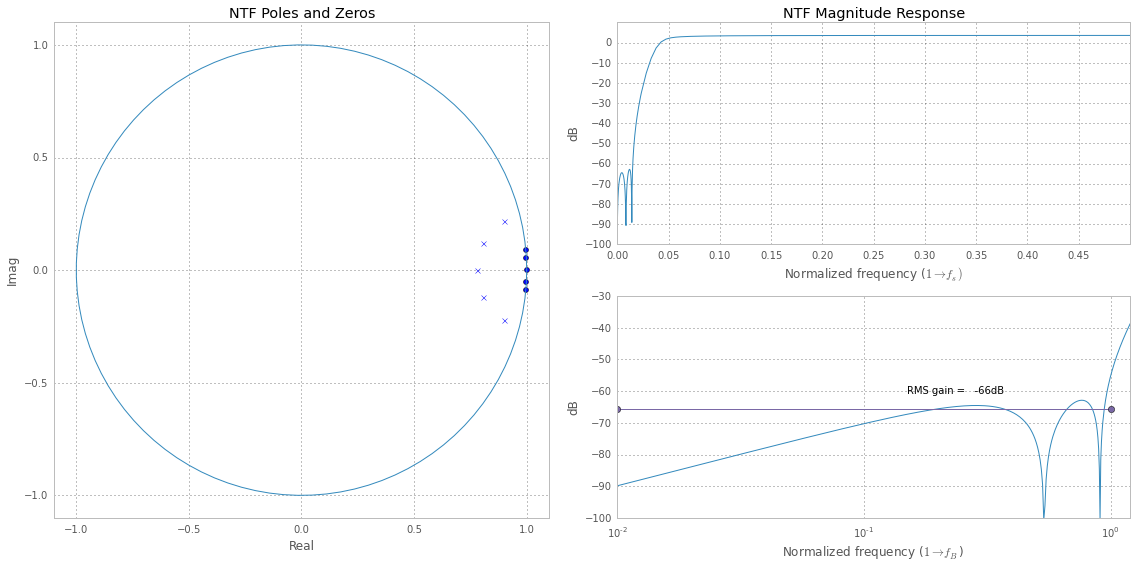

In [ ]:
# Synthesize again!
H0 = None
H1 = synthesizeNTF(order, OSR, opt=1)
# 1. Plot the singularities.
subplot(121)
plotPZ(H1, markersize=5)
title('NTF Poles and Zeros')
f = np.concatenate((np.linspace(0, 0.75/OSR, 100), np.linspace(0.75/OSR, 0.5, 100)))
z = np.exp(2j*np.pi*f)
magH1 = dbv(evalTF(H1, z))
# 2. Plot the magnitude responses.
subplot(222)
plot(f, magH1)
figureMagic([0, 0.5], 0.05, None, [-100, 10], 10, None, (16, 8))
xlabel('Normalized frequency ($1\\rightarrow f_s)$')
ylabel('dB')
title('NTF Magnitude Response')
# 3. Plot the magnitude responses in the signal band.
subplot(224)
fstart = 0.01
f = np.linspace(fstart, 1.2, 200)/(2*OSR)
z = np.exp(2j*np.pi*f)
magH1 = dbv(evalTF(H1, z))
semilogx(f*2*OSR, magH1)
axis([fstart, 1.2, -100,- 30])
grid(True)
sigma_H1 = dbv(rmsGain(H1, 0, 0.5/OSR))
#semilogx([fstart, 1], sigma_H1*np.array([1, 1]))
semilogx([fstart, 1], sigma_H1*np.array([1, 1]),'-o')
text(0.15, sigma_H1 + 5, 'RMS gain = %5.0fdB' % sigma_H1)
xlabel('Normalized frequency ($1\\rightarrow f_B$)')
ylabel('dB')
tight_layout()

5th-order modulator: comparison
-------------------------------

Overlayed plots follow to ease comparison of the two synthetization approaches.

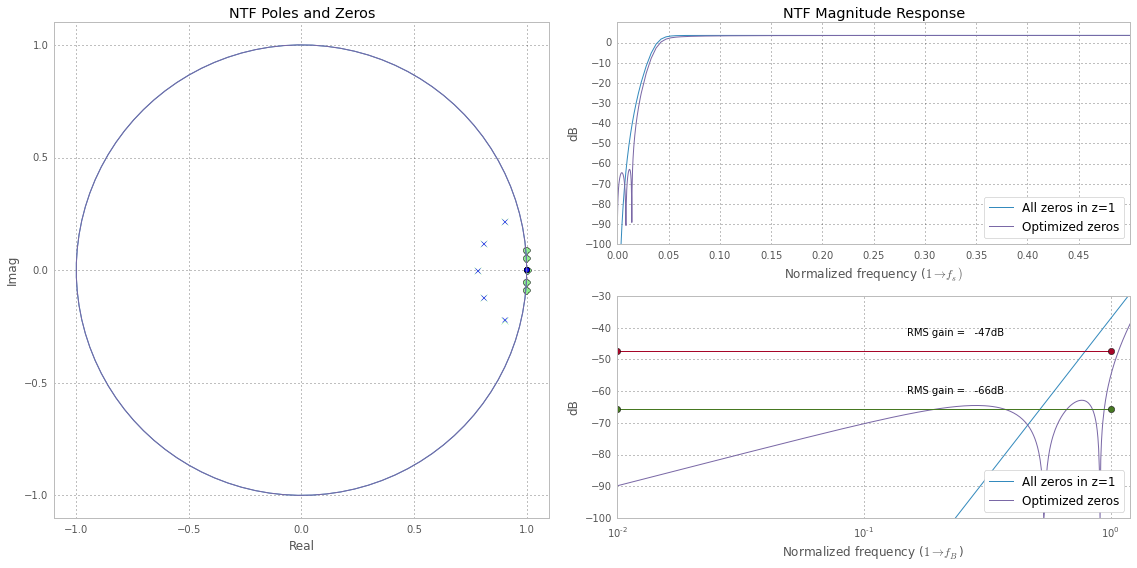

In [ ]:
# Synthesize!
H0 = synthesizeNTF(order, OSR, opt=0)
H1 = synthesizeNTF(order, OSR, opt=1)
# 1. Plot the singularities.
subplot(121)
# we plot the singularities of the optimized NTF in light 
# green with slightly bigger markers so that we can better
# distinguish the two NTF's when overlayed.
plotPZ(H1, markersize=7, color='#90EE90')
hold(True)
plotPZ(H0, markersize=5)
title('NTF Poles and Zeros')
f = np.concatenate((np.linspace(0, 0.75/OSR, 100), np.linspace(0.75/OSR, 0.5, 100)))
z = np.exp(2j*np.pi*f)
magH0 = dbv(evalTF(H0, z))
magH1 = dbv(evalTF(H1, z))
# 2. Plot the magnitude responses.
subplot(222)
plot(f, magH0, label='All zeros in z=1')
hold(True)
plot(f, magH1, label='Optimized zeros')
figureMagic([0, 0.5], 0.05, None, [-100, 10], 10, None, (16, 8))
xlabel('Normalized frequency ($1\\rightarrow f_s)$')
ylabel('dB')
legend(loc=4)
title('NTF Magnitude Response')
# 3. Plot the magnitude responses in the signal band.
subplot(224)
fstart = 0.01
f = np.linspace(fstart, 1.2, 200)/(2*OSR)
z = np.exp(2j*np.pi*f)
magH0 = dbv(evalTF(H0, z))
magH1 = dbv(evalTF(H1, z))
semilogx(f*2*OSR, magH0, label='All zeros in z=1')
hold(True)
semilogx(f*2*OSR, magH1, label='Optimized zeros')
axis([fstart, 1.2, -100,- 30])
grid(True)
sigma_H0 = dbv(rmsGain(H0, 0, 0.5/OSR))
sigma_H1 = dbv(rmsGain(H1, 0, 0.5/OSR))
#semilogx([fstart, 1], sigma_H0*np.array([1, 1]))
plot([fstart, 1], sigma_H0*np.array([1, 1]), 'o-')
text(0.15, sigma_H0 + 5, 'RMS gain = %5.0fdB' % sigma_H0)
#semilogx([fstart, 1], sigma_H1*np.array([1, 1]))
plot([fstart, 1], sigma_H1*np.array([1, 1]), 'o-')
text(0.15, sigma_H1 + 5, 'RMS gain = %5.0fdB' % sigma_H1)
xlabel('Normalized frequency ($1\\rightarrow f_B$)')
ylabel('dB')
legend(loc=4)
tight_layout()

8th-order bandpass Modulator
----------------------------
In the following, we synthesize an 8th-order modulator with optimized zeros.

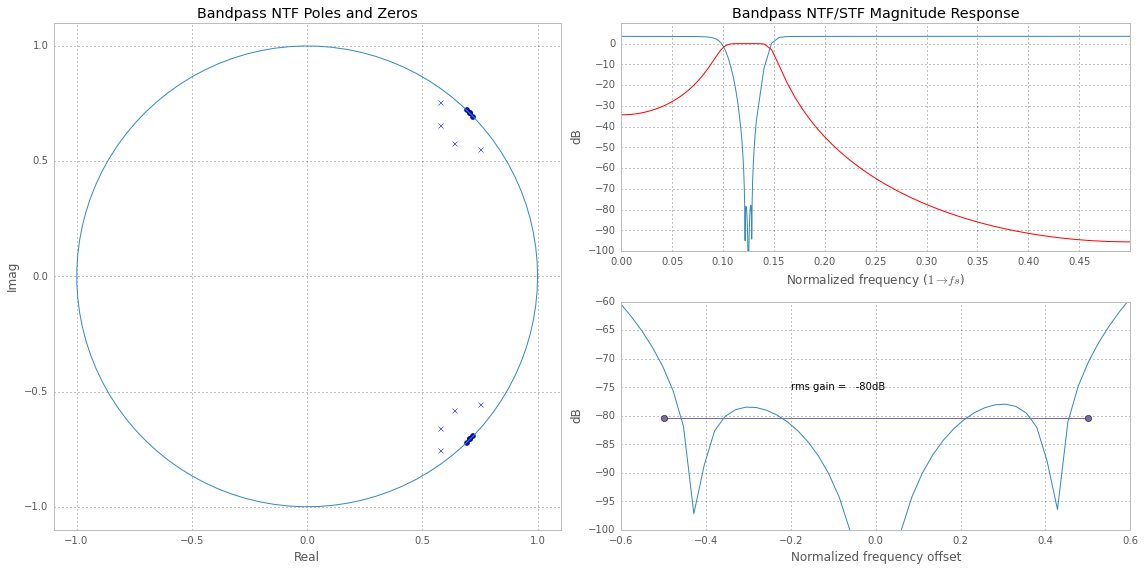

In [ ]:
order = 8
OSR = 64
opt = 2
f0 = 0.125
H = synthesizeNTF(order, OSR, opt, 1.5, f0)
subplot(121)
plotPZ(H)
title('Bandpass NTF Poles and Zeros')
f = np.concatenate((np.linspace(0, f0 - 1./(2.*OSR), 50), 
                    np.linspace(f0 - 1./ (2 * OSR), f0 + 1./(2.*OSR), 100), 
                    np.linspace(f0 + 1./(2.*OSR), 0.5, 50)))
z = np.exp(2j * pi * f)
magH = dbv(evalTF(H, z))
subplot(222)
plot(f, magH)
hold(True)
G = (np.zeros((order/2,)), H[1], 1)
k = 1./np.abs(evalTF(G, np.exp(2j*np.pi*f0)))
G = (G[0], G[1], k)
magG = dbv(evalTF(G, z))
plot(f, magG, 'r')
figureMagic([0, 0.5], 0.05, None, [-100, 10], 10, None, (16, 8))
#axis([0, 0.5, -100, 10])
grid(True)
xlabel('Normalized frequency ($1 \\rightarrow fs$)')
ylabel('dB')
title('Bandpass NTF/STF Magnitude Response')
f = np.linspace(f0 - 0.3/OSR, f0 + 0.3/OSR)
z = np.exp(2j*np.pi*f)
magH = dbv(evalTF(H, z))
subplot(224)
fstart = -.5
plot(2*OSR*(f - f0), magH)
axis([- 0.6, 0.6, -100, -60])
grid(True)
sigma_H = dbv(rmsGain(H, f0 - 0.25/OSR, f0 + 0.25/OSR))
hold(True)
#plot([-0.5, 0.5], sigma_H*np.array([1, 1]))
plot([-0.5, 0.5], sigma_H*np.array([1, 1]), 'o-')
text(-.2, sigma_H + 5, 'rms gain = %5.0fdB' % sigma_H)
xlabel('Normalized frequency offset')
ylabel('dB')
tight_layout()

Further information about NTF synthesis
---------------------------------------

Please refer to `help(synthesizeNTF)` for detailed - and possibly more updated - documentation!

###`help(synthesizeNTF)` as of writing:


Help on function synthesizeNTF in module deltasigma._synthesizeNTF:

**synthesizeNTF(order=3, osr=64, opt=0, H_inf=1.5, f0=0.0)**

Synthesize a noise transfer function for a delta-sigma modulator.

**Parameters:**

order : *int, optional*
    the order of the modulator, defaults to 3

osr : *float, optional*
    the oversamping ratio, defaults to 64

opt : *int or list of floats, optional*
    flag for optimized zeros, defaults to 0

* 0 -> not optimized,
* 1 -> optimized,
* 2 -> optimized with at least one zero at band-center,
* 3 -> optimized zeros (with optimizer)
* 4 -> same as 3, but with at least one zero at band-center
* [z] -> zero locations in complex form

H_inf : *real, optional*
    max allowed peak value of the NTF. Defaults to 1.5

f0 : *real, optional*
    center frequency for BP modulators, or 0 for LP modulators.
    Defaults to 0.

    1 corresponds to the sampling frequency, so that 0.5 is the
    maximum value. A value of 0 specifies an LP modulator.

**Returns:**

ntf : *tuple*
    noise transfer function in zpk form.

**Raises:**

ValueError

* 'Error. f0 must be less than 0.5' if f0 is out of range

* 'Order must be even for a bandpass modulator.' if the order is
  incompatible with the modulator type.

* 'The opt vector must be of length xxx' if opt is used to explicitly
  pass the NTF zeros and these are in the wrong number.

**Warns:**

* 'Creating a lowpass ntf.' if the center frequency is different
  from zero, but so low that a low pass modulator must be designed.

* 'Unable to achieve specified H_inf ...' if the desired H_inf
  cannot be achieved.

* 'Iteration limit exceeded' if the routine converges too slowly.

**Notes:**

This is actually a wrapper function which calls the appropriate version
of synthesizeNTF, based on the module control flag `optimize_NTF` which
determines whether to use optimization tools.

Parameter ``H_inf`` is used to enforce the Lee stability criterion.

**See also:**

* `clans()` : Closed-Loop Analysis of Noise-Shaper. 

An alternative method for selecting NTFs based on the 1-norm of the 
      impulse response of the NTF
    
* `synthesizeChebyshevNTF()` : Select a type-2 highpass Chebyshev NTF.

This function does a better job than synthesizeNTF if osr
   or H_inf is low.

### System version information

In [ ]:
#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib, deltasigma

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.4.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
deltasigma 0.2.2
Fri Aug 07 15:50:47 2015 CEST